In [1]:
import time
import numpy as np
import random

# Order of Growth Functions

Only a few possible order of growth functions for (almost) all algorithms:
- 1 (constant time)
- log N
- N
- N log N
- N^2
- N^3
- 2^N

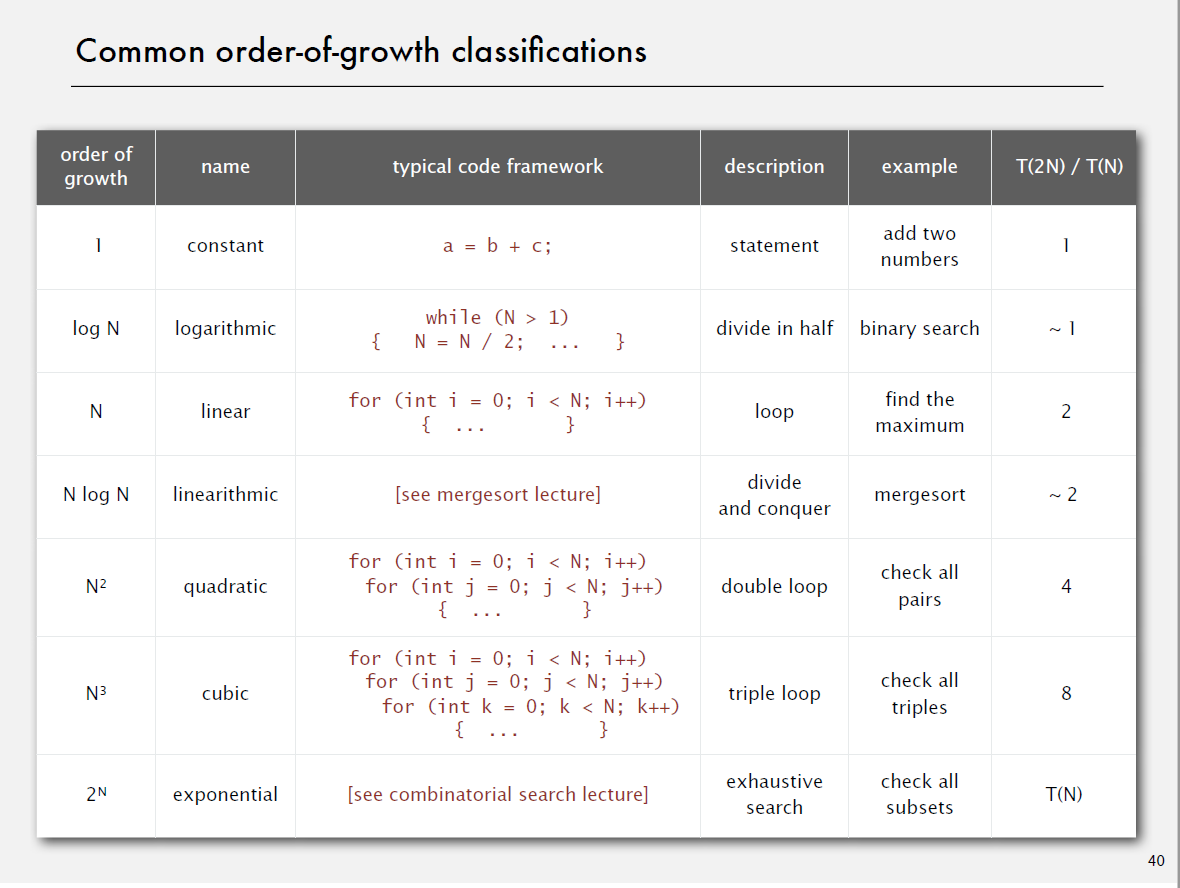

# Big O

* Big O notation is technically used to develop <strong>upper bounds</strong> on algorithm performance! See below table

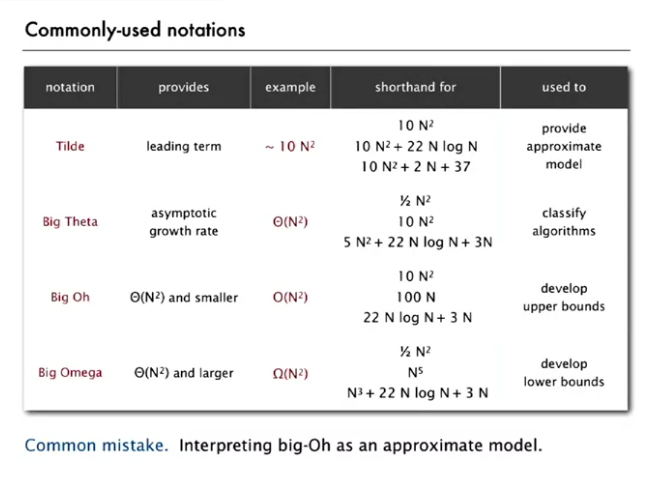

# Binary Search

Given a <strong>sorted</strong> array, return the position of an element in the array, if it exists

In [60]:
class BinarySearch:
    def __init__(self, n):
        self.arr = [int(np.random.random() * 1000000) * (-1) ** i for i in range(0, n)]
        self.arr.sort()
    def brute(self, x):
        for i in range(0, len(self.arr) - 1):
            if x == self.arr[i]:
                return i
        return -1
    def binary(self, x):
        lo, hi = 0, len(self.arr) - 1
        while lo <= hi:
            mid = lo + (hi - lo) // 2
            guess = self.arr[mid]
            if x == guess:
                return mid
            elif x < guess:
                hi = mid - 1
            elif x > guess:
                lo = mid + 1
        return -1

In [61]:
t = BinarySearch(10000000)

In [64]:
s = time.time()
print(t.brute(450), time.time() - s)

5002262 0.941213846206665


In [65]:
s = time.time()
print(t.binary(450), time.time() - s)

5002262 0.0


# 3-SUM

Given N distinct integers, how many triples sum to 0?

In [71]:
class ThreeSum:
    def __init__(self, n):
        self.ints = [int(np.random.random() * 10000) * (-1) ** i for i in range(0, n)]
    def brute(self):
        s = time.time()
        n = len(self.ints)
        count = 0
        for i in range(0, n):
            for j in range(i + 1, n):
                for k in range(j + 1, n):
                    if self.ints[i] + self.ints[j] + self.ints[k] == 0:
                        count += 1
        e = time.time()
        return count, f'{e - s}s'

# Sorting Algorithms

Helper functions for sorting algorithms

In [47]:
def is_sorted(arr):
    for i in range(0, len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True

def swap(arr, i, j):
    swap = arr[i]
    arr[i] = arr[j]
    arr[j] = swap

## Selection Sort

Proceeding from the beginning of an array, check to see if the current element is greater than the smallest element to the right in the array. If it is, swap the two elements. Then, look at the next item in the array and repeat until all items have been checked.

Running time = Quadratic

In [166]:
class SelectionSort:
    def __init__(self, arr):
        self.arr = arr
    def is_less(self, x, y):
        return min(self.arr[x], self.arr[y]) == self.arr[x]
    def exchange(self, i, j):
        swap = self.arr[i]
        self.arr[i] = self.arr[j]
        self.arr[j] = swap
    def sort(self):
        N = len(self.arr)
        for i in range(0, N):
            min = i
            for j in range(i + 1, N):
                if self.is_less(j, min):
                    min = j
                self.exchange(i, min)
    def is_sorted(self):
        for i in range(0, len(self.arr) - 1):
            if self.arr[i + 1] < self.arr[i]:
                return False
        return True

## Insertion Sort

Proceding from the beginning of an array, swap the current element with each larger element to its left in the array.

Time complexity is still Quadradic, but on average, fewer operations will be performed that selection sort (1/4 N^2 as opposed to 1/2 N^2). So, compared to selection sort, insertion sort will be about twice as fast on average.

Running time of insertion sort also depends on the initial order of the array. In the best case (where the array is already ordered), insertion sort will be much faster than selection sort. But in the worst case, where the array is in descending order, insertion sort will perform worse than selection sort, as it will need to perform many more exchange operations.

For partially sorted arrays, insertion sort runs in <strong>linear</strong> time.

In [193]:
class InsertionSort:
    def __init__(self, arr):
        self.arr = arr
    def is_less(self, x, y):
        return min(self.arr[x], self.arr[y]) == self.arr[x]    
    def exchange(self, i, j):
        swap = self.arr[i]
        self.arr[i] = self.arr[j]
        self.arr[j] = swap
    def sort(self):
        N = len(self.arr)
        for i in range(0, N):
            for j in range(i, 0, -1):
                if self.is_less(j, j - 1):
                    self.exchange(j, j - 1)
                else:
                    break
    def is_sorted(self):
        for i in range(0, len(self.arr) - 1):
            if self.arr[i + 1] < self.arr[i]:
                return False
        return True

## Shell Sort

Shell sort uses the same underlying algorithm as insertion sort, but sorts a series of increasingly large sub-arrays until finally sorting the entire array.

Sorting these sub-arrays is called h-sorting the array, and it dramatically improves on insertion sort by taking advantage of the fact that insertion sort is much faster when the array is partially sorted.

So to implement shell sort, decide on a series of increments to use to h-sort the array (eg, 7, 3, 1), then apply the same insertion sort algorithm using those increments.

A common formula to get the increments to use in h-sorting is h = 3x + 1 for h <= N

Time complexity is somewhere between N and N^2 depending on increments used. Always faster than straight insertion sort though.

Why is shell sort interesting?
* It's a great example of a simple idea leading to large performance gains
* Useful in practice becase it's fast and doesn't require a lot of code to implement (so useful in hardware applications)

In [216]:
class ShellSort:
    def __init__(self, arr):
        self.arr = arr
    def is_less(self, x, y):
        return min(self.arr[x], self.arr[y]) == self.arr[x]
    def exchange(self, i, j):
        swap = self.arr[i]
        self.arr[i] = self.arr[j]
        self.arr[j] = swap
    def sort(self):
        N = len(self.arr)
        h = 1
        # Get max value of h
        while h < N//3:
            h = 3 * h + 1
        while h >= 1:
            for i in range(h, N):
                for j in range(i, h - 1, -h):
                    if self.is_less(j, j - h):
                        self.exchange(j, j - h)
            h = h//3
    def is_sorted(self):
        for i in range(0, len(self.arr) - 1):
            if self.arr[i + 1] < self.arr[i]:
                return False
        return True

## Shuffling

Shuffling a sorted array is a somewhat related problem: How can we generate a uniformly random permutation of the sorted array in linear time?

Starting at the beginning of the array and proceeding from left to right, choose a random integer to the left of the current position in the array, then swap the current element with that element in the array.

Time complexity is linear because each position in the array will only be shuffled once.

In [230]:
class Shuffle:
    def __init__(self, arr):
        self.arr = arr
    def exchange(self, i, j):
        swap = self.arr[i]
        self.arr[i] = self.arr[j]
        self.arr[j] = swap
    def shuffle(self):
        N = len(self.arr)
        for i in range(0, N):
            r = random.randint(0, i)
            self.exchange(i, r)

In [234]:
for i in range(0, 5):
    l = [i for i in range(0, 20)]
    s = Shuffle(l)
    s.shuffle()
    print(s.arr)

[9, 5, 8, 4, 3, 17, 11, 14, 16, 0, 1, 7, 13, 18, 2, 12, 6, 10, 19, 15]
[16, 1, 14, 3, 15, 4, 13, 2, 17, 19, 18, 12, 9, 0, 6, 10, 8, 11, 5, 7]
[4, 17, 6, 15, 1, 7, 12, 14, 16, 9, 2, 19, 18, 0, 13, 5, 10, 11, 3, 8]
[8, 15, 14, 2, 3, 11, 0, 16, 12, 19, 17, 9, 4, 13, 5, 10, 6, 7, 1, 18]
[15, 18, 4, 3, 16, 2, 0, 5, 10, 14, 9, 12, 8, 19, 1, 7, 13, 17, 6, 11]


## Application: Convex Hulls

A convex hull is a computational geometry concept defined at the smallest possible permiter fence enclosing a set of N points. Useful for route planning around obstacles.

The Graham Scan is a useful algorithm for finding the convex hull given a set of points, and the most important part of that algorithm is the sort.

Demonstrates the importance of good fundamental algorithms as building blocks for larger, more complex algorithms!

## Mergesort

Critically important algorithm.

Basic idea is that you recursively divide an array in half, sort each half, then merge the halves together.

How to merge?
1. Copy two sorted subarrays to a secondary array. 
2. Maintain 3 pointers i, j, k. i and j start at the beginning of each sorted subarray, k starts at the beginning of the original array.
3. Compare element i to element j and add the smallest to the original array at position k.
4. Increment k and either i or j, depending on which one you just added.

Merge sort uses at most N log N compares (And 6N log N array accesses) to sort any array of size N. Very, very fast!

Merge sort uses extra memory proportional to N (unlike seletion, insertion, and shell sorts, which are truly in-place sorts)

In [43]:
def is_sorted(arr):
    for i in range(0, len(arr) - 1):
        if arr[i + 1] < arr[i]:
            return False
    return True

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        left = arr[:mid]
        right = arr[mid:]
        
        merge_sort(left)
        merge_sort(right)
        
        i, j, k = 0, 0, 0
        while k <= len(arr) - 1:
            if i > len(left) - 1:
                arr[k] = right[j]
                j += 1
            elif j > len(right) - 1:
                arr[k] = left[i]
                i += 1
            elif left[i] > right[j]:
                arr[k] = right[j]
                j += 1
            else:
                arr[k] = left[i]
                i += 1
            k += 1

In [438]:
l = [random.randint(0, 100) for i in range (0, 50)]

In [439]:
merge_sort(l)

#### Practical improvements for merge sort:

* Use insertion sort for small sub-arrays (eg, less than 7) to reduce the overhead of the recursive calls. (~20% improvement). This is useful because insertion sort is very efficient for small arrays.
* Check to see if the array is partially sorted by looking at whether the biggest element in the first half is already smaller than the smaller than the smallest element in the second half.

In [74]:
def insertion_sort(arr):
    for i in range(0, len(arr)):
        for j in range(0, i):
            if arr[i] < arr[j]:
                swap = arr[i]
                arr[i] = arr[j]
                arr[j] = swap
def merge_with_insert(arr):
    if len(arr) <= 7:
        insertion_sort(arr)
    else:
        mid = len(arr)//2
        left = arr[:mid]
        right = arr[mid:]
        
        merge_with_insert(left)
        merge_with_insert(right)
        
        i, j, k = 0, 0, 0
        while k <= len(arr) - 1:
            if i > len(left) - 1:
                arr[k] = right[j]
                j += 1
            elif j > len(right) - 1:
                arr[k] = left[i]
                i += 1
            elif left[i] > right[j]:
                arr[k] = right[j]
                j += 1
            else:
                arr[k] = left[i]
                i += 1
            k += 1
            
def merge_with_insert_and_partial(arr):
    if len(arr) <= 7:
        insertion_sort(arr)
    else:
        mid = len(arr)//2
        left = arr[:mid]
        right = arr[mid:]
        
        merge_with_insert_and_partial(left)
        merge_with_insert_and_partial(right)
        
        if left[len(left) - 1] <= right[0]:
            return #already sorted
        else:
            i, j, k = 0, 0, 0
            while k <= len(arr) - 1:
                if i > len(left) - 1:
                    arr[k] = right[j]
                    j += 1
                elif j > len(right) - 1:
                    arr[k] = left[i]
                    i += 1
                elif left[i] < right[j]:
                    arr[k] = left[i]
                    i += 1
                else:
                    arr[k] = right[j]
                    j += 1
                k += 1

In [25]:
arr = [random.randint(0, 1000000) for i in range (0, 100000)]
copy = arr.copy()
copy2 = arr.copy()
s = time.time()
merge_sort(arr)
print(time.time() - s)
s = time.time()
merge_with_insert(copy)
print(time.time() - s)
s = time.time()
merge_with_insert_and_partial(copy2)
print(time.time() - s)

0.9784977436065674
0.8940081596374512
0.9199943542480469


## Quicksort

Another critically important algorithm!

Quicksort works by recursively partitioning an array such that elements to the left of the pivot point are less than the pivot, while items to the right are greater than the pivot point.

Steps:
* Shuffle the array (important to guarantee performance)
* Partition the array so that for some element i, i is inplace (ie, in its final order), and everything to the left of i is less than i, and everything to the right of i is greater than i
* Recursively sort the left and right subarrays

In [61]:
def shuffle(arr):
    N = len(arr)
    i = 0
    while i < N:
        j = random.randint(0, i)
        swap = arr[i]
        arr[i] = arr[j]
        arr[j] = swap
        i += 1
    return

def swap(arr, a, b):
    swap = arr[a]
    arr[a] = arr[b]
    arr[b] = swap
    return
    
def partition(arr, lo, hi):
    pivot = arr[lo]
    i = lo
    for j in range(lo + 1, hi):
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[lo] = arr[lo], arr[i]
    return i
    
def quicksort(arr, lo, hi):
    if hi <= lo:
        return
    j = partition(arr, lo, hi)
    quicksort(arr, lo, j - 1)
    quicksort(arr, j + 1, hi)

In [66]:
def quicksort_py(arr):
    if len(arr) < 2:
        return arr
    pivot_index = random.randint(0, len(arr) - 1)
    pivot = arr.pop(pivot_index)
    left = [i for i in arr if i <= pivot]
    right = [i for i in arr if i > pivot]
    return quicksort_py(left) + [pivot] + quicksort_py(right)

In [87]:
arr = [random.randint(0, 1000000) for i in range(0, 100000)]
copy = arr.copy()
copy2 = arr.copy()

In [88]:
s = time.time()
merge_with_insert_and_partial(arr)
print(time.time() - s)
s = time.time()
quicksort(copy, 0, len(copy)-1)
print(time.time() - s)
s = time.time()
quicksort_py(copy2)
print(time.time() - s)

0.9729044437408447
0.5216548442840576
0.529066801071167


* Quicksort is quite a bit faster than merge sort.
* Quicksort also has the advantage of not using any extra space (merge sort uses an extra array)
* Shuffling the array (effectively picking a random pivot/partitioning element) helps guard against the worst case for quicksort (which is 1/2 N^2, but is extremeley unlikely to occur in practice, particularly with shuffling)

#### Practical Improvements for Quicksort

* Just like merge sort, using insertion sort for small sub-arrays improves performance of quicksort (see below)

In [63]:
def insertion_sort(arr):
    for i in range(0, len(arr)):
        for j in range(0, i):
            if arr[i] < arr[j]:
                swap(arr, i, j)
def quicksort_with_insert(arr, lo, hi):
    if hi <= lo:
        return
    elif len(arr) < 5:
        insertion_sort(arr)
    else:
        j = partition(arr, lo, hi)
        quicksort_with_insert(arr, lo, j - 1)
        quicksort_with_insert(arr, j + 1, hi)

In [64]:
arr = [random.randint(0, 1000000) for i in range(0, 100000)]
copy = arr.copy()
s = time.time()
quicksort(arr, 0, len(arr) - 1)
print(f'{time.time() - s}')
s = time.time()
quicksort_with_insert(copy, 0, len(arr) - 1)
print(f'{time.time() - s}')

0.41977572441101074
0.4342184066772461


#### Quicksort on arrays with many duplicates

Quicksort will run in <strong>QUADRATIC</strong> time on arrays with many duplicates, unless partitioning is stopped when keys are equal.

How to solve? 3-way partitioning: put all elements less than the partitioning key to the left, elements greater to the right, and all copies of the partitioning key in the middle.

In [106]:
def quick3way(arr, lo, hi):
    if hi <= lo:
        return
    lt = lo
    gt = hi
    i = lo + 1
    partition_ele = arr[lo]
    while i <= gt:
        if arr[i] < partition_ele:
            swap(arr, i, lt)
            lt += 1
            i += 1
        elif arr[i] > partition_ele:
            swap(arr, i, gt)
            gt -= 1
        elif arr[i] == partition_ele:
            i += 1
    quick3way(arr, lo, lt - 1)
    quick3way(arr, gt + 1, hi)
    
def quick3way_py(arr):
    if len(arr) < 2:
        return arr
    pivot_index = random.randint(0, len(arr) - 1)
    pivot = arr[pivot_index]
    left = [i for i in arr if i < pivot]
    middle = [i for i in arr if i == pivot]
    right = [i for i in arr if i > pivot]
    return quick3way_py(left) + middle + quick3way_py(right)

In [109]:
arr = [random.randint(0, 3) for i in range(0, 10000)]
copy = arr.copy()
copy2 = arr.copy()
s = time.time()
quicksort(copy, 0, len(arr) - 1)
print(f'{time.time() - s}')
s = time.time()
quick3way(arr, 0, len(arr) - 1)
print(f'{time.time() - s}')
s = time.time()
quick3way_py(arr)
print(f'{time.time() - s}')

1.4437496662139893
0.0070073604583740234
0.0029942989349365234


Bottom line: Using 3-way quicksort reduces runtime from linearithmic to linear time across a broad range of pratical applications.

## Applications of Sorting: Selection (Quickselect)

Given an array of N items, find the kth largest item. Eg, finding the minimum would be k = 0, max = N-1, median = N/2

Theoretically, selecting the kth element could take linear time in the best case (eg, one pass through the array to find the smallest element), or N log N time (sorting the array using quicksort, then selecting the kth element in constant time).

Based on the theortical minimum time, people looked for and found a selection algorithm that operates in <strong>linear time</strong> using a quicksort-like approach: quickselect.

Quickselect works by partitioning an array just like quicksort, then checking to see whether the partitioning element is greater than or less than k and then recursively partitioning either the left or right partition accordingly.

In [39]:
def quickselect(arr, k):
    shuffle(arr)
    lo = 0
    hi = len(arr) - 1
    while hi > lo:
        j = partition(arr, lo, hi)
        if j < k:
            lo = j + 1
        elif j > k:
            hi = j - 1
        else:
            return arr[k]
    return arr[k]

In [42]:
arr = [random.randint(0, 1000000) for i in range(0, 100000)]
copy = arr.copy()
copy2 = arr.copy()
s = time.time()
result = quickselect(arr, len(arr) // 2)
print(f'{result} found in {time.time() - s}s')
s = time.time()
quick3way(copy, 0, len(copy) - 1)
result = copy[len(copy)//2]
print(f'{result} found in {time.time() - s}s')
s = time.time()
copy2.sort()
result = copy2[len(copy2)//2]
print(f'{result} found in {time.time() - s}s')

502068 found in 0.21046853065490723s


NameError: name 'quick3way' is not defined

## Heapsort

Heapsort takes advantage of the efficient heap data structure to create an efficient sorting algorithm.

1. Given an unordered array, build a max-oriented heap using the bottom-up method (ie, starting at the end)
2. Repeatedly remove the max element from the heap (sortdown).
3. Once finished you'll have a sorted array.

In [295]:
class Heap:
    def __init__(self, arr):
        self.arr = arr
        
    def is_empty(self):
        return len(self.pq) == 0
    
    def is_heaped(self):
        for k in range(len(self.arr) - 1, 0, -1):
            if self.arr[k] > self.arr[(k - 1) // 2]:
                return False
        return True
    
    def is_sorted(self):
        for k in range(0, len(self.arr) - 1):
            if self.arr[k] > self.arr[k + 1]:
                return False
        return True
    
    def heapify(self):
        """Builds max-oriented binary heap from unsorted array"""
        # Start at the smallest parent, not last element, hence k = N//2
        for k in range(len(self.arr)//2 - 1, -1, -1):
            self._sink(k, len(self.arr))
            
    def sort(self):
        N = len(self.arr) - 1
        while N > 0:
            self._swap(0, N)
            N -= 1
            self._sink(0, N)
    
    def _sink(self, k, N):
        """Sinks kth element in heap, within the sub-heap defined by N"""
        while 2 * k + 1 <= N:
            j = 2 * k
            if j + 1 <= N and self.arr[j] < self.arr[j + 1]:
                j += 1
            if self.arr[k] >= self.arr[j]:
                break
            self._swap(k, j)
            k = j
            
    def _swap(self, i, j):
        swap = self.arr[i]
        self.arr[i] = self.arr[j]
        self.arr[j] = swap
        

In [308]:
for i in range(0, 1000):
    nums = [random.randint(0, 1000) for i in range(0, 1000)]
    h = Heap(nums)
    h.heapify()
    h.sort()
    if not h.is_sorted():
        print('busted')

#### Analysis of Heapsort

* Building the heap uses at most 2N compares and exchanges (linear time), sorting the heap takes log N compares and exchanges, so the total heapsort algorithm runs in ~N log N time.
* Heapsort has the advantage of being both in-place and N log N worst case!
    * Better than mergesort, which is not in-place
    * Better than quicksort, which is quadratic in the worst case (although not likely)
    * <strong>Heapsort is a good answer to the question of 'what is an in-place sorting algorithm that is guaranteed N log N time?'
* <strong>However</strong>, heapsort isn't often used because 1) the inner loop is longer than quicksort, 2) it makes poor use of cache memory, and 3) it's not stable (like mergesort)

## Summary of Sorting Algorithms

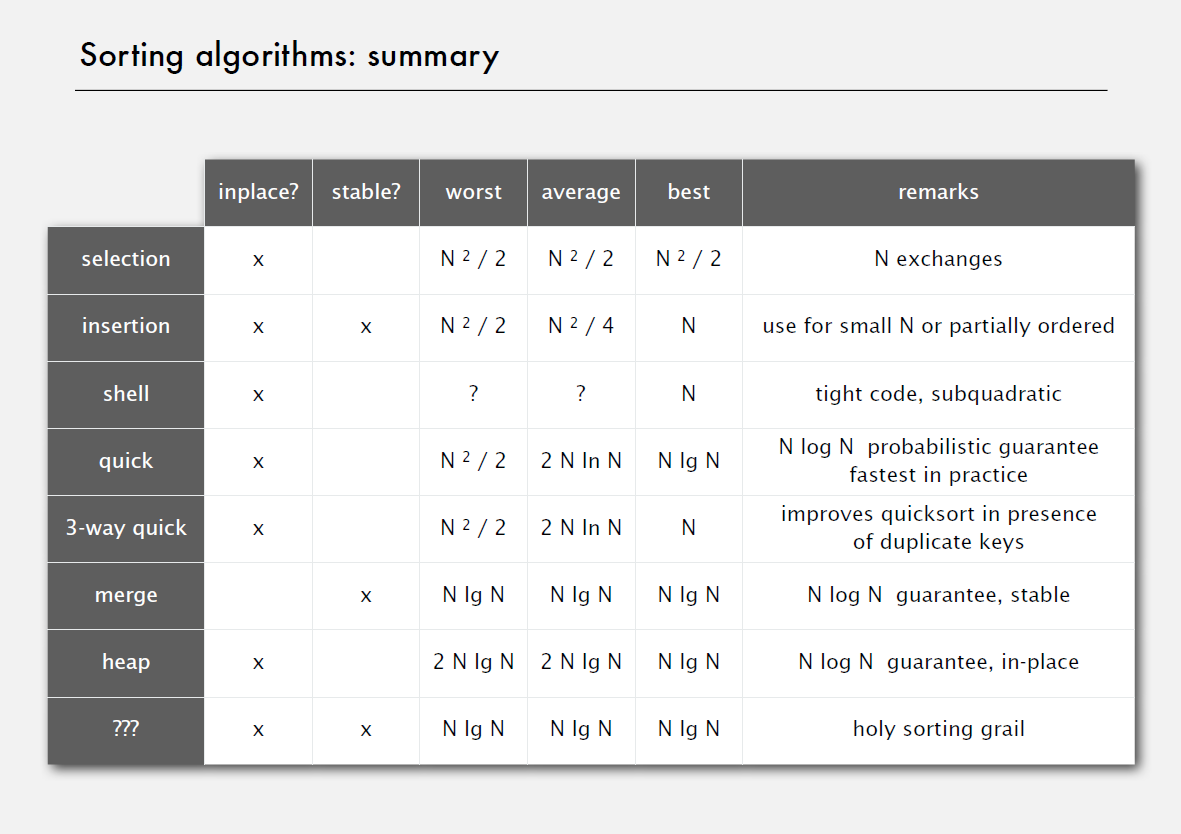